# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city and search units
    #Set units for search
    units = "metric"
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | college
Processing Record 4 of Set 1 | petropavlovsk-kamchatsky
Processing Record 5 of Set 1 | ormara
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | mana
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | sinop
Processing Record 13 of Set 1 | santander
Processing Record 14 of Set 1 | warrnambool
Processing Record 15 of Set 1 | lihue
Processing Record 16 of Set 1 | akureyri
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | okhotsk
Processing Record 22 of Set 1 | taiohae
City not found. Skipping...
Processing

Processing Record 39 of Set 4 | zeya
Processing Record 40 of Set 4 | nuuk
Processing Record 41 of Set 4 | athens
Processing Record 42 of Set 4 | patterson
Processing Record 43 of Set 4 | saint-joseph
Processing Record 44 of Set 4 | quesnel
Processing Record 45 of Set 4 | khromtau
Processing Record 46 of Set 4 | badger
Processing Record 47 of Set 4 | chashniki
Processing Record 48 of Set 4 | al burayqah
Processing Record 49 of Set 4 | crane
Processing Record 0 of Set 5 | belabo
Processing Record 1 of Set 5 | colares
Processing Record 2 of Set 5 | coxen hole
Processing Record 3 of Set 5 | al majaridah
Processing Record 4 of Set 5 | gadzhiyevo
Processing Record 5 of Set 5 | port alfred
Processing Record 6 of Set 5 | tazovsky
Processing Record 7 of Set 5 | sandnessjoen
Processing Record 8 of Set 5 | taitung city
Processing Record 9 of Set 5 | nelson bay
Processing Record 10 of Set 5 | okha
Processing Record 11 of Set 5 | whitehorse
Processing Record 12 of Set 5 | inirida
Processing Record 

Processing Record 35 of Set 8 | tindouf
Processing Record 36 of Set 8 | kyaukse
Processing Record 37 of Set 8 | poronaysk
Processing Record 38 of Set 8 | guangyuan
Processing Record 39 of Set 8 | lauro de freitas
Processing Record 40 of Set 8 | geraldton
Processing Record 41 of Set 8 | cheremukhovo
Processing Record 42 of Set 8 | sambava
Processing Record 43 of Set 8 | middelburg
Processing Record 44 of Set 8 | mount gambier
Processing Record 45 of Set 8 | tazacorte
Processing Record 46 of Set 8 | camana
Processing Record 47 of Set 8 | hadibu
Processing Record 48 of Set 8 | kasongo-lunda
Processing Record 49 of Set 8 | baie-saint-paul
Processing Record 0 of Set 9 | michigan city
Processing Record 1 of Set 9 | mezgor'e
City not found. Skipping...
Processing Record 2 of Set 9 | trairi
Processing Record 3 of Set 9 | ebaye
Processing Record 4 of Set 9 | port glaud
City not found. Skipping...
Processing Record 5 of Set 9 | batticaloa
Processing Record 6 of Set 9 | ciudad lazaro cardenas
Pro

Processing Record 22 of Set 12 | orcopampa
Processing Record 23 of Set 12 | arboga
Processing Record 24 of Set 12 | bandar
Processing Record 25 of Set 12 | plymouth
Processing Record 26 of Set 12 | daru
Processing Record 27 of Set 12 | tamanrasset
Processing Record 28 of Set 12 | ballesteros
Processing Record 29 of Set 12 | taltal
Processing Record 30 of Set 12 | rouyn-noranda
Processing Record 31 of Set 12 | chernyshevsk
Processing Record 32 of Set 12 | saint-pierre
Processing Record 33 of Set 12 | anloga
Processing Record 34 of Set 12 | rukban
City not found. Skipping...
Processing Record 35 of Set 12 | ust'-kulom
Processing Record 36 of Set 12 | alaghsas
Processing Record 37 of Set 12 | zhezqazghan
Processing Record 38 of Set 12 | kavieng
Processing Record 39 of Set 12 | pearsall
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,1.01,74,24,4.19,GS,1700944474
1,papatowai,-46.5619,169.4708,14.97,64,46,3.16,NZ,1700944475
2,college,64.8569,-147.8028,-5.86,89,40,0.00,US,1700944475
3,petropavlovsk-kamchatsky,53.0452,158.6483,-6.42,69,20,11.62,RU,1700944237
4,ormara,25.2088,64.6357,23.01,60,99,4.62,PK,1700944475


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,1.01,74,24,4.19,GS,1700944474
1,papatowai,-46.5619,169.4708,14.97,64,46,3.16,NZ,1700944475
2,college,64.8569,-147.8028,-5.86,89,40,0.00,US,1700944475
3,petropavlovsk-kamchatsky,53.0452,158.6483,-6.42,69,20,11.62,RU,1700944237
4,ormara,25.2088,64.6357,23.01,60,99,4.62,PK,1700944475


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

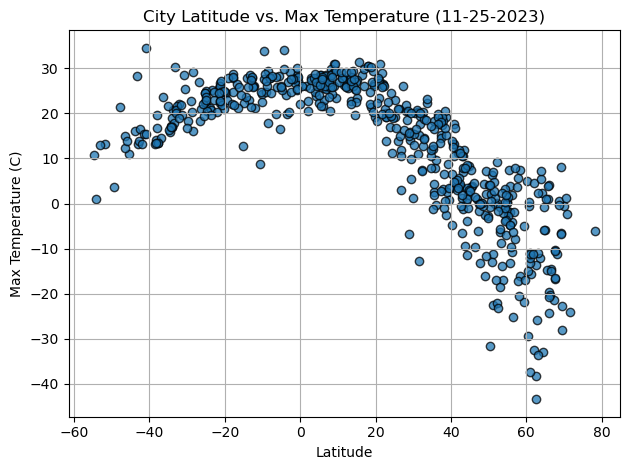

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.75, edgecolors="black")

# Incorporate the other graph properties
date = datetime.now()
date = date.strftime("%m-%d-%Y")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

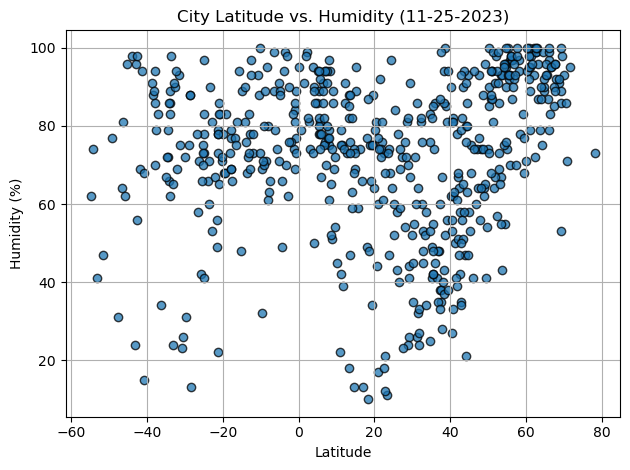

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.75, edgecolors="black")

# Incorporate the other graph properties
date = datetime.now()
date = date.strftime("%m-%d-%Y")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

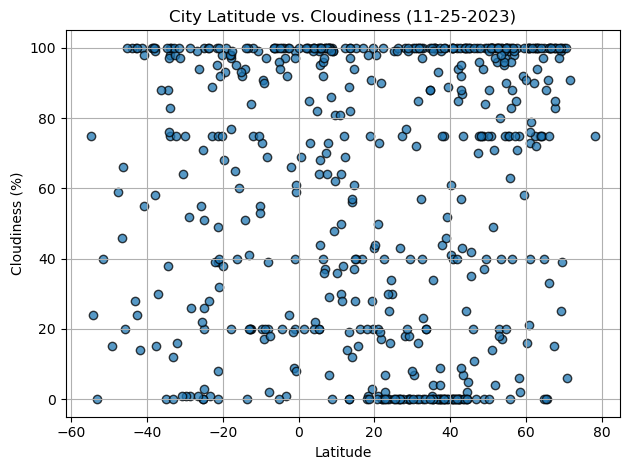

In [22]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.75, edgecolors="black")

# Incorporate the other graph properties
date = datetime.now()
date = date.strftime("%m-%d-%Y")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

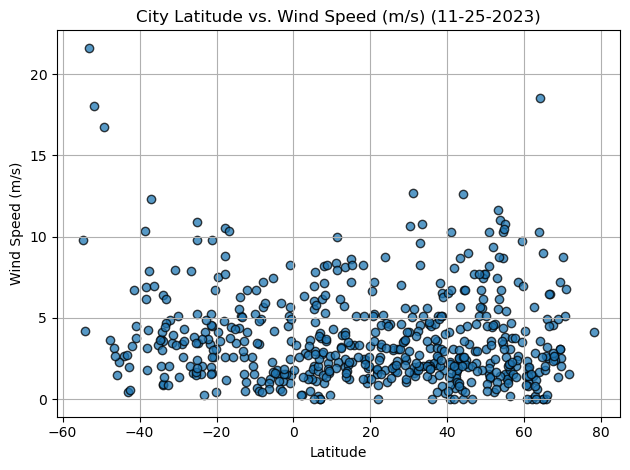

In [24]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.75, edgecolors="black")

# Incorporate the other graph properties
date = datetime.now()
date = date.strftime("%m-%d-%Y")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed (m/s) ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [56]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create scatter plot
    plt.scatter(x_values, y_values)

    # Plot regression line
    plt.plot(x_values, regress_values, "r-")

    # Label plot
    plt.title(f"{title}\n{line_eq}", fontsize=15, color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)

    # Print r-squared value
    print(f"The r-squared is: {rvalue**2}")

In [57]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,college,64.8569,-147.8028,-5.86,89,40,0.00,US,1700944475
3,petropavlovsk-kamchatsky,53.0452,158.6483,-6.42,69,20,11.62,RU,1700944237
4,ormara,25.2088,64.6357,23.01,60,99,4.62,PK,1700944475
8,mana,5.6592,-53.7767,26.99,81,68,4.72,GF,1700944476
9,kodiak,57.7900,-152.4072,5.73,100,100,2.06,US,1700944477


In [58]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,1.01,74,24,4.19,GS,1700944474
1,papatowai,-46.5619,169.4708,14.97,64,46,3.16,NZ,1700944475
5,adamstown,-25.0660,-130.1015,21.79,83,100,10.90,PN,1700944476
6,blackmans bay,-43.0167,147.3167,13.18,96,100,0.45,AU,1700944476
7,puerto natales,-51.7236,-72.4875,13.25,47,40,18.01,CL,1700944476


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7330121729982607


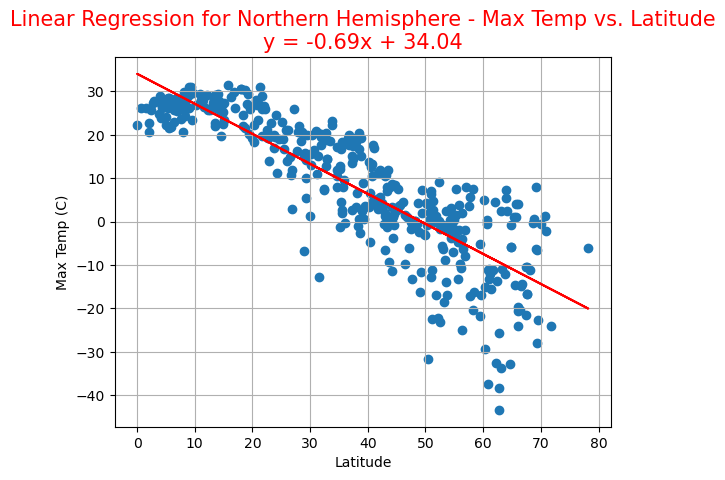

In [59]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, 
                       "Linear Regression for Northern Hemisphere - Max Temp vs. Latitude",
                       "Latitude", "Max Temp (C)", (10,20))

The r-squared is: 0.4585916646977915


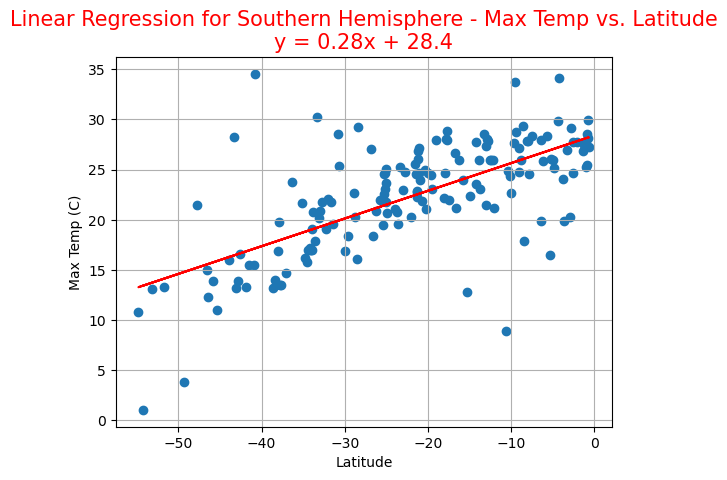

In [60]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, 
                       "Linear Regression for Southern Hemisphere - Max Temp vs. Latitude",
                       "Latitude", "Max Temp (C)", (15,25))

**Discussion about the linear relationship:** This observation holds significance as it sheds light on the correlation between latitude and temperature. The progression away from the equator is accompanied by a decrease in temperature just as a progression towards the equator is accompanied by an increase in overall temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.06475658939693606


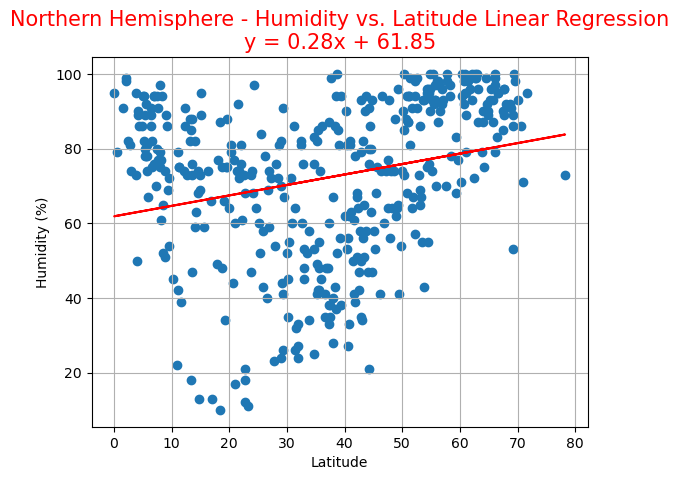

In [61]:
# Northern Hemisphere
x_values_humidity = northern_hemi_df["Lat"]
y_values_humidity = northern_hemi_df["Humidity"]

# Call the plot_linear_regression function for Humidity vs. Latitude
plot_linear_regression(x_values_humidity, y_values_humidity, 
                       "Northern Hemisphere - Humidity vs. Latitude Linear Regression",
                       "Latitude", "Humidity (%)", (10,20))

The r-squared is: 0.0427427823786369


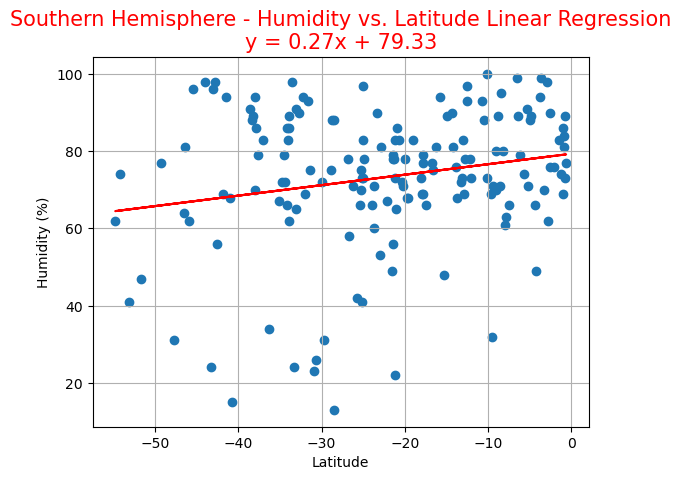

In [62]:
# Southern Hemisphere
x_values_humidity = southern_hemi_df["Lat"]
y_values_humidity = southern_hemi_df["Humidity"]

# Call the plot_linear_regression function for Humidity vs. Latitude
plot_linear_regression(x_values_humidity, y_values_humidity, 
                       "Southern Hemisphere - Humidity vs. Latitude Linear Regression",
                       "Latitude", "Humidity (%)", (10,20))

**Discussion about the linear relationship:** Although the relationship is slightly positive, though there doesn't appear to be a strong coorelation between humidity and latitude - but tends to increase slightly towards the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.02016871889631317


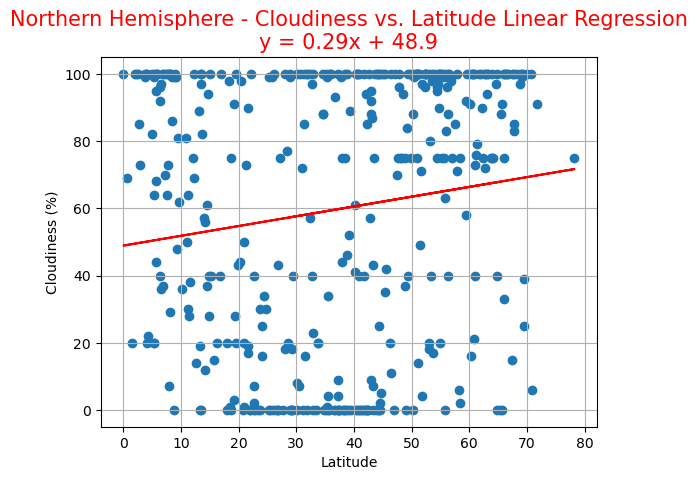

In [63]:
# Northern Hemisphere
x_values_cloudiness = northern_hemi_df["Lat"]
y_values_cloudiness = northern_hemi_df["Cloudiness"]

# Call the plot_linear_regression function for Cloudiness vs. Latitude
plot_linear_regression(x_values_cloudiness, y_values_cloudiness, 
                       "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression",
                       "Latitude", "Cloudiness (%)", (10,20))

The r-squared is: 0.0004325093897546091


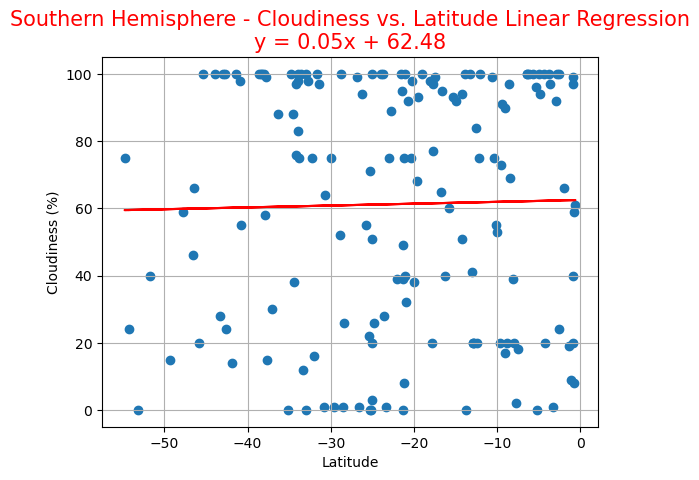

In [64]:
# Southern Hemisphere
x_values_cloudiness = southern_hemi_df["Lat"]
y_values_cloudiness = southern_hemi_df["Cloudiness"]

# Call the plot_linear_regression function for Cloudiness vs. Latitude
plot_linear_regression(x_values_cloudiness, y_values_cloudiness, 
                       "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression",
                       "Latitude", "Cloudiness (%)", (10,20))

**Discussion about the linear relationship:** There doesn't seem to be any correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0015785167770287491


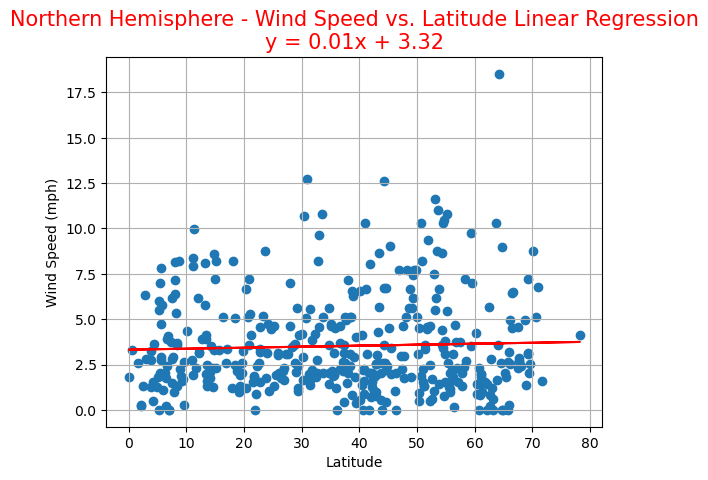

In [65]:
# Northern Hemisphere
x_values_wind_speed = northern_hemi_df["Lat"]
y_values_wind_speed = northern_hemi_df["Wind Speed"]

# Call the plot_linear_regression function for Wind Speed vs. Latitude
plot_linear_regression(x_values_wind_speed, y_values_wind_speed, 
                       "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression",
                       "Latitude", "Wind Speed (mph)", (10,20))

The r-squared is: 0.07934070967465424


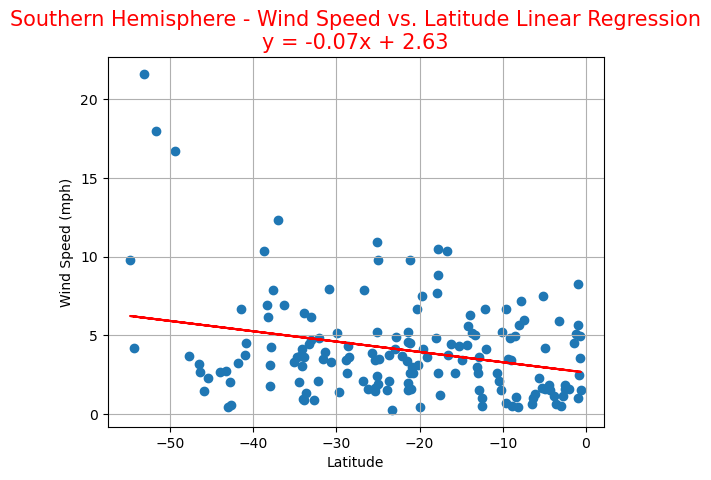

In [66]:
# Southern Hemisphere
x_values_wind_speed = southern_hemi_df["Lat"]
y_values_wind_speed = southern_hemi_df["Wind Speed"]

# Call the plot_linear_regression function for Wind Speed vs. Latitude
plot_linear_regression(x_values_wind_speed, y_values_wind_speed, 
                       "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression",
                       "Latitude", "Wind Speed (mph)", (10,20))

**Discussion about the linear relationship:** There doesn't seem to be any correlation between latitude and wind speed.